# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_results = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_mouse_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
mouse_count = len(combined_mouse_results["Mouse ID"].unique())
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_mouse_results.loc[combined_mouse_results.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_g989 = combined_mouse_results.loc[combined_mouse_results["Mouse ID"] == "g989"]
duplicate_mouse_g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
reduced_mouse_results = combined_mouse_results.drop(combined_mouse_results["Mouse ID"] == "g989", errors = "ignore")
reduced_mouse_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count2 = len(reduced_mouse_results["Mouse ID"].unique())
mouse_count2

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped_tumor = reduced_mouse_results.groupby(["Drug Regimen"])

tumor_mean = grouped_tumor["Tumor Volume (mm3)"].mean()
tumor_median = grouped_tumor["Tumor Volume (mm3)"].median()
tumor_variance = grouped_tumor["Tumor Volume (mm3)"].var()
tumor_stdev = grouped_tumor["Tumor Volume (mm3)"].std()
tumor_sem = grouped_tumor["Tumor Volume (mm3)"].sem()

tumor_summary = pd.DataFrame({"Mean Tumor Volume":tumor_mean,
                              "Median Tumor Volume":tumor_median,
                              "Tumor Volume Variance":tumor_variance,
                              "Tumor Volume Std. Dev.":tumor_stdev,
                              "Tumor Volume Std. Err.":tumor_sem})
tumor_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_summary2 = grouped_tumor["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_summary2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

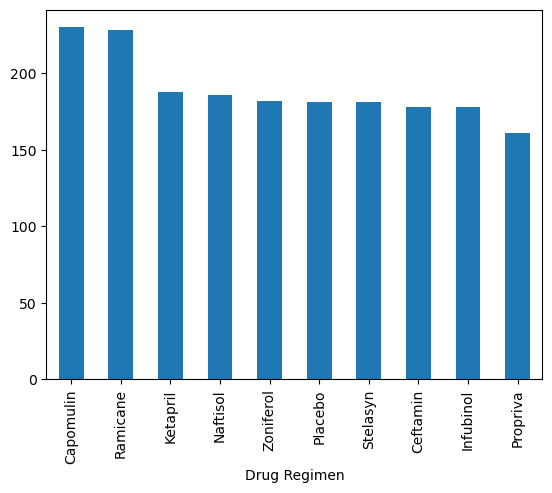

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint = grouped_tumor['Timepoint'].count() 
timepoint.sort_values(ascending=False).plot.bar()  
plt.show()

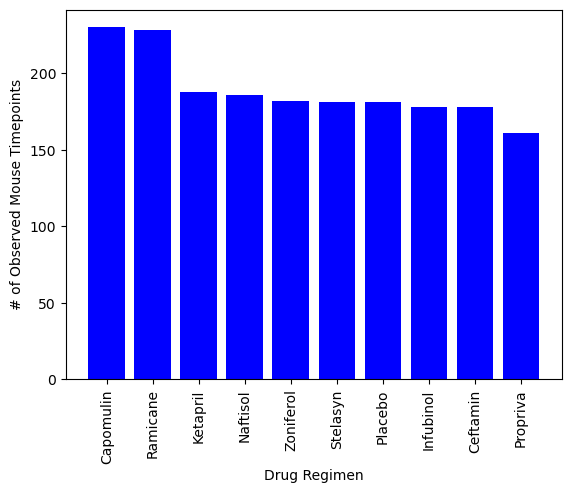

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"]
timepoint = timepoint.sort_values(ascending=False)
plt.bar(timepoint.index, timepoint.values)
x_axis = np.arange(len(drug_regimen))
plt.bar(x_axis, timepoint, color="blue", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimen, rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

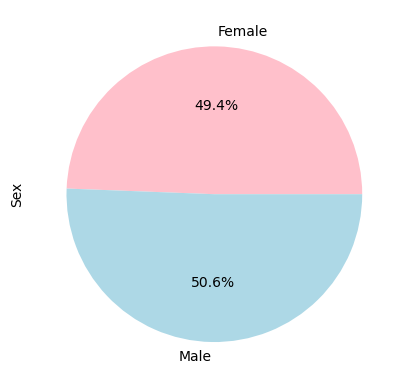

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = reduced_mouse_results.groupby(['Sex'])['Sex'].count().plot(kind = "pie", colors=("pink", "lightblue"), autopct='%1.1f%%', subplots = True)

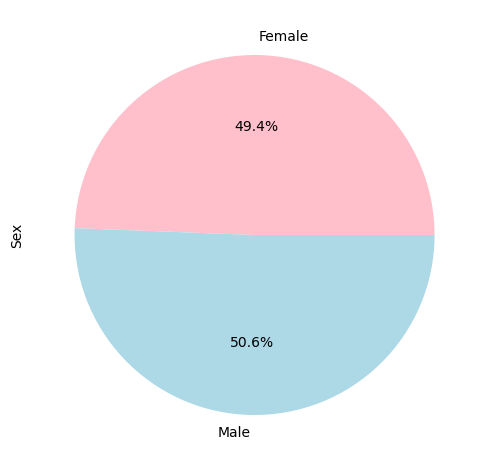

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = reduced_mouse_results.groupby(["Sex"])["Sex"].count()
labels = ["Female", "Male"]
plt.pie(sex, labels=labels, colors=("pink", "lightblue"), autopct='%1.1f%%')
plt.ylabel('Sex') 
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = pd.DataFrame(reduced_mouse_results.groupby(['Mouse ID'])['Timepoint'].max()).reset_index().rename(columns={'Timepoint': 'Max Timepoint'})
last_timepoint_df


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_df = pd.merge(reduced_mouse_results, last_timepoint_df, on=('Mouse ID'))
final_tumor_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
...,...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17,45
1889,m601,30,31.758275,1,Capomulin,Male,22,17,45
1890,m601,35,30.834357,1,Capomulin,Male,22,17,45
1891,m601,40,31.378045,1,Capomulin,Male,22,17,45


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:

    final_df = final_tumor_df.loc[final_tumor_df["Drug Regimen"] == drug]
    
    final_volume_df = final_df.loc[final_df["Timepoint"] == final_df["Max Timepoint"]]
    
    volume = final_volume_df["Tumor Volume (mm3)"]
    tumor_volume.append(volume)
    
    quartiles = volume.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq  - lowerq
    print(f"IQR for {drug}: {iqr}")
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    outliers_count = (volume.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')
    print("-------------------------------------------")

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
-------------------------------------------
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
-------------------------------------------
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
-------------------------------------------
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0
-------------------------------------------


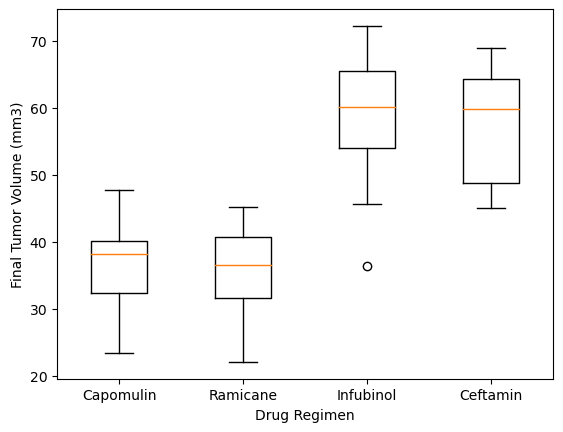

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_volume)
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel("Final Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

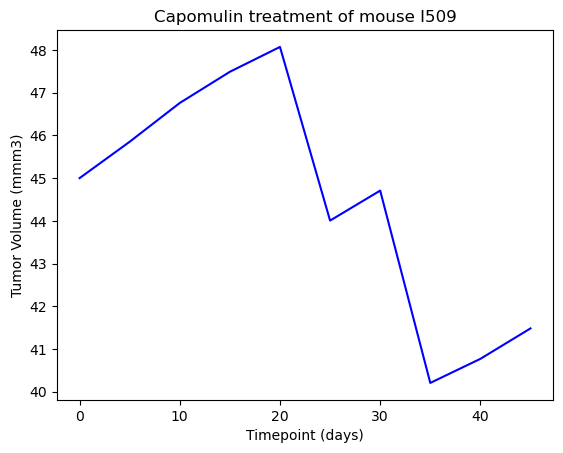

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_I509 = reduced_mouse_results.loc[reduced_mouse_results["Mouse ID"] == "l509",:]
x_axis = mouse_I509["Timepoint"] 
tumor_volume = mouse_I509["Tumor Volume (mm3)"] 
plt.plot(x_axis, tumor_volume, color = "blue")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mmm3)")
plt.title("Capomulin treatment of mouse I509")
plt.show()

C:\Users\jnhut\AppData\Local\Temp\ipykernel_24640\1655629858.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_average = capomulin_df.groupby(["Mouse ID"]).mean()


Text(0, 0.5, 'Average Tumor Volume (mm3)')

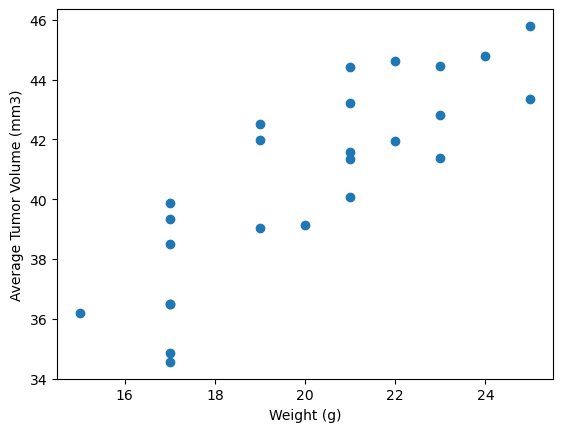

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = reduced_mouse_results.loc[reduced_mouse_results["Drug Regimen"] == "Capomulin",:]
capomulin_average = capomulin_df.groupby(["Mouse ID"]).mean()
x_values = capomulin_average["Weight (g)"]
y_values = capomulin_average["Tumor Volume (mm3)"]
plt.scatter(x_values,y_values)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


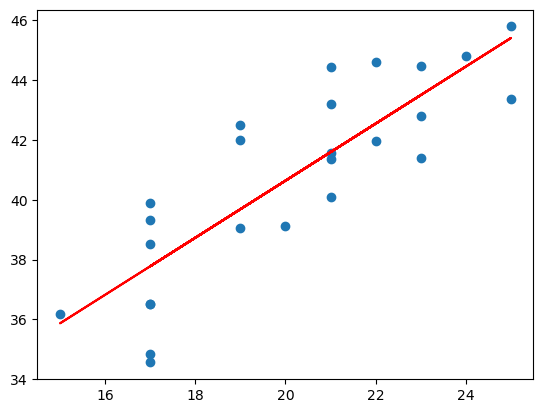

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = round(st.pearsonr(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

x_values = capomulin_average["Weight (g)"]
y_values = capomulin_average["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (30, 50), fontsize=15, color="red")
plt.show()